<a href="https://colab.research.google.com/github/AsraSelen/Statistical-Learning-from-Data-Applications-in-Physics-HW/blob/main/Copy_of_Untitled18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gştfrom google.colab import drive
drive.mount('/content/drive/') 

In [ ]:
from zipfile import ZipFile

!unzip '/content/drive/MyDrive/meerkatfinal.zip'
!unzip '/content/drive/MyDrive/swanfinal 2.zip'

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image

path="/content/"

arraylist=np.zeros((1,224*224))

def mylistdir(directory):   #Prevention for interruption of.DS Store files
    filelist = os.listdir(directory)
    return [x for x in filelist
            if not (x.startswith('.'))]
cat=["swanfinal"]
i=0
for category in cat:
    path=os.path.join(path,category)
    for img in mylistdir(path):
        print(img)
        i=i+1
        img1=img
        image = Image.open(path +"/"+str(img))
        img=image.resize((224,224),Image.ANTIALIAS)
        img = img.convert('RGB')
        newdir=path +"/"+str(img1) +'.jpg'
        img_resized=img.save(newdir)
        img_array=cv2.imread(newdir,cv2.IMREAD_GRAYSCALE)
        swanarray=img_array.flatten()
        arraylist=np.vstack((arraylist,swanarray))
        plt.imshow(img_array,cmap="gray")
        plt.show()
        
        if i==500:
            arraylistswan=arraylist[1:,:] 
            break
        
path="/content/"
arraylist=np.zeros((1,224*224))        
cat=["meerkatfinal"]    
i=0
for category in cat:
    path=os.path.join(path,category)
    for img in mylistdir(path):
        print(img)
        i=i+1
        img1=img
        image = Image.open(path +"/"+str(img))
        img=image.resize((224,224),Image.ANTIALIAS)
        img = img.convert('RGB')
        newdir=path +"/"+str(img1) +'.jpg'
        img_resized=img.save(newdir)
        img_array=cv2.imread(newdir,cv2.IMREAD_GRAYSCALE)
        meerarray=img_array.flatten()
        arraylist=np.vstack((arraylist,meerarray))
        plt.imshow(img_array,cmap="gray")
        plt.show()
        
        if i==500:
            arraylistmeer=arraylist[1:,:] 
            break
        

In [ ]:
#LABELING

arraylistswan=np.hstack(( arraylistswan,np.zeros((np.size(arraylistswan,0),1)))) #swan label =0
arraylistmeer=np.hstack(( arraylistmeer,np.ones((np.size(arraylistmeer,0),1)))) #meerkat label =1

#TRAINING random !!!!!change it !!! make num of images in classes equal 
#np.random.shuffle(datamatrix)
training_setr = np.vstack((arraylistswan[:int(0.45*np.size(arraylistswan,0)), :],arraylistmeer[:int(0.45*np.size(arraylistmeer,0)), :]))
testing_setr = np.vstack((arraylistswan[int(0.45*np.size(arraylistswan,0)):, :],arraylistmeer[int(0.45*np.size(arraylistmeer,0)):, :]))


In [ ]:
np.random.shuffle(testing_setr)
np.random.shuffle(training_setr)

In [ ]:
#TRAINING if it works delete this cell
#training_set = datamatrix[:int(0.9*np.size(datamatrix,0)), :]
#testing_set =  datamatrix[int(0.9*np.size(datamatrix,0)):, :]

In [ ]:
#VOTING

testdata=100
rows = testing_setr[:testdata, :] 

#broadcasting with training data for every testing row
acc=np.zeros(10)
i=-1
for k in range(1,20,2):
 i=i+1
 c=0
 for n in range(len(rows)):

   pt=testing_setr[n-1,:224*224] #must be 1x50176
 #distance
   d=np.sqrt(np.sum(np.square(training_setr[:,:224*224]-pt),axis=1)) #kac square??
   z=training_setr[:,-1]
   dlabel=np.transpose(np.vstack((d,z)))
 #label  
   sortedarr = dlabel[dlabel[:,0].argsort()]
   vote=sum(sortedarr[:k,1])/k
   if vote < 0.5 :
     pt1=np.zeros(1) #pt1=np.hstack((pt,np.zeros(1)))
   else:
     pt1=np.ones(1)
   corr=rows[n-1,np.size(rows,1)-1]-pt1

   if corr==0:
     c=c+1
 acc[i]=(c/testdata)*100

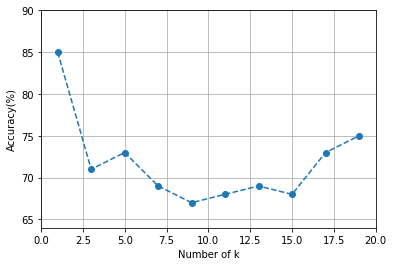

In [ ]:
k=np.linspace(1,19,10)                         
plt.xlabel("Number of k")
plt.ylabel("Accuracy(%)")
plt.xlim(0,20)
plt.ylim(64,90)
plt.plot(k,acc,marker='o', linestyle='--')
plt.grid()
plt.show()
